## 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader

토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행

In [3]:
import torchvision.transforms as transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [5]:
mnist_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5, ), std=(1.0, ))]) # 각 채널별로 평균 0.5, 표준편차 1.0으로 정규화

In [6]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=mnist_transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=mnist_transform)

100%|██████████| 9912422/9912422 [00:01<00:00, 5113060.50it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 1907648.72it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 1782296.49it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



`DataLoader`는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 `batch_size` 크기만큼 데이터를 가져옴

In [7]:
train_loader = DataLoader(dataset=train_dataset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=8, shuffle=False, num_workers=2)

In [10]:
data_iter = iter(train_loader)        # 반복자로 변환
images, labels = next(data_iter)      # 반복자로부터 데이터를 가져옴
images.shape, labels.shape            # 형태 확인(배치 크기, 채널 수, 높이, 너비), (배치 크기)  -> 8개의 이미지, 8개의 레이블

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [13]:
torch_image = torch.squeeze(images[0]) # squeeze() 함수를 사용하여 채널 차원을 제거
torch_image.shape

torch.Size([28, 28])

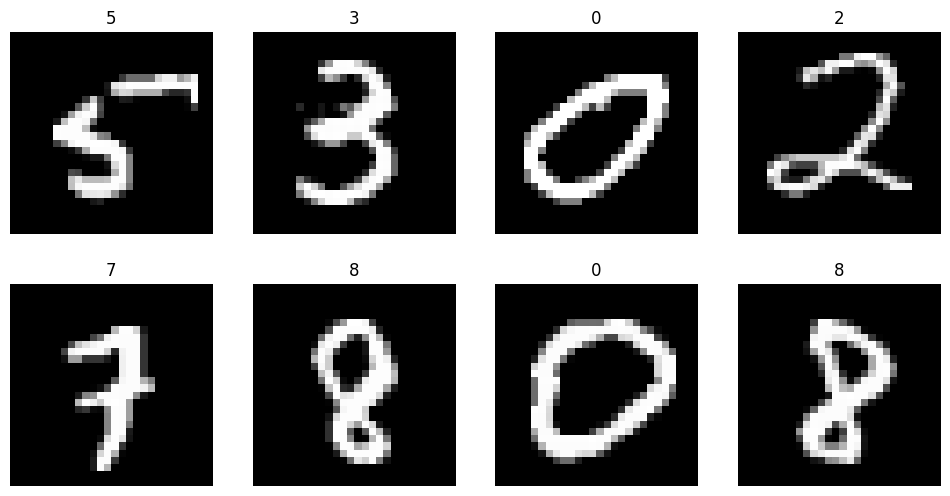

In [14]:
import matplotlib.pyplot as plt 

figure = plt.figure(figsize=(12, 6))
cols, rows = 4, 2
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(train_dataset), size=(1, )).item()  # 0부터 len(train_dataset) - 1까지의 정수 중 하나를 랜덤하게 선택
  img, label = train_dataset[sample_idx]  # 랜덤하게 선택한 인덱스의 이미지와 레이블을 가져옴
  figure.add_subplot(rows, cols, i)       # 그림을 그릴 위치를 지정
  plt.title(label)                        # 레이블을 제목으로 설정
  plt.axis("off")                         # 축을 제거하여 이미지만 표시
  plt.imshow(img.squeeze(), cmap="gray")  # 이미지를 그림
plt.show()